In [3]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creates a table data structure which is easy to manipulate
df = pd.read_csv("data/ex1data1.csv", header=None)
df.rename(columns={0: 'population', 1: 'profit'}, inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


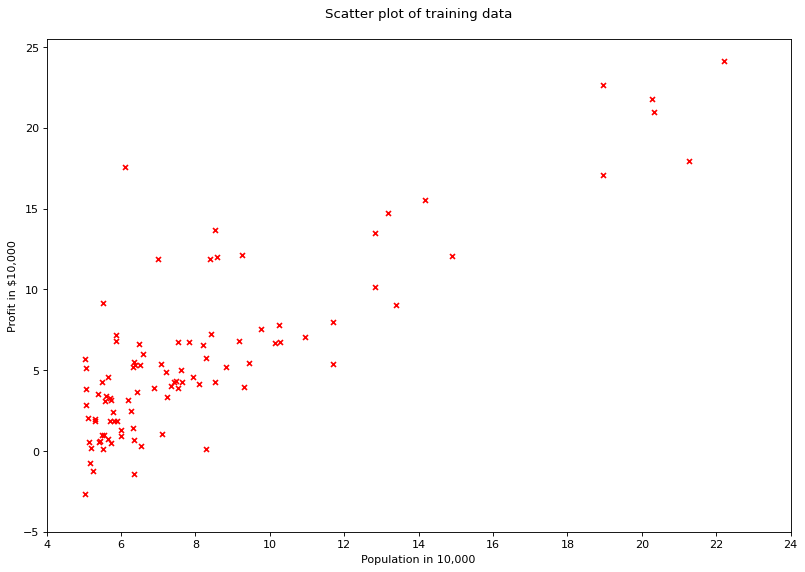

In [4]:
# visualising the data
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20)
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.show()

In [5]:
class LinearRegression(object):
    """Performs Linear Regression using Batch Gradient
    Descent."""
    def __init__(self, X, y, alpha=0.01, n_iterations=5000):
        """Initialise variables.
        
        Parameters
        ----------
        y : numpy array like, output / dependent variable
        X : numpy array like, input / independent variables
        alpha : float, int. Learning Rate
        n_iterations : Number of maximum iterations to perform
            gradient descent
        """
        self.y = y
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.2f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coefficients
        of the bias terms
        
        Parameters
        ----------
        input_matrix: numpy array like (N x M). Where N = number of 
            examples. M = Number of features.
        
        Returns
        -------
        numpy array with stacked column of ones (N x M + 1)
        """
        return np.hstack((np.ones((input_matrix.shape[0], 1)),
                              input_matrix))

    def cost(self, ):
        """Calculates the cost of current configuration"""
        return (1 / (2 * self.n_rows)) * np.sum(
            (self.X.dot(self.thetas) - self.y) ** 2)

    def predict(self, new_X):
        """Predict values using current configuration
        
        Parameters
        ----------
        new_X : numpy array like
        """
        
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)

    def batch_gradient(self, ):
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1, 1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, cost), end="")

In [6]:
X = df['population'].values.reshape(-1, 1)
y = df['profit'].values.reshape(-1, 1)
lr = LinearRegression(X, y)
lr.batch_gradient_descent()

Cost before fitting: 32.07


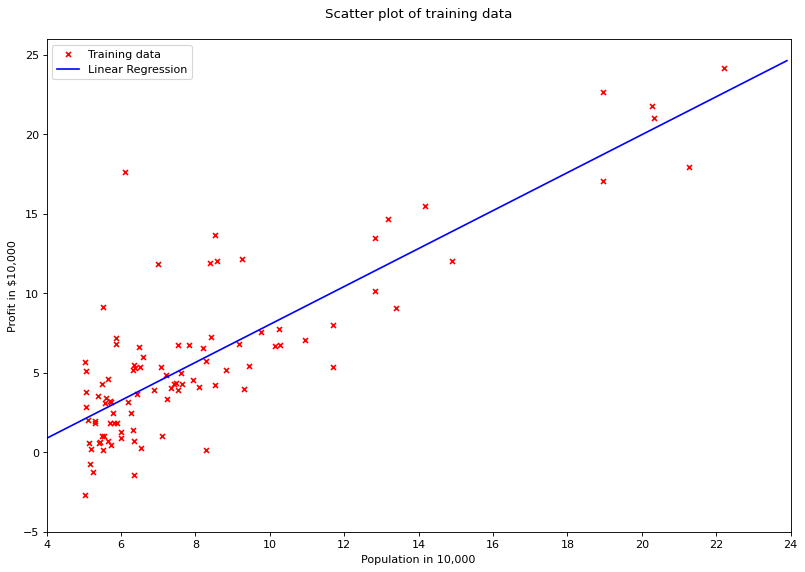

In [7]:
# plot regression line
X = np.arange(4, 24, 0.1).reshape(-1, 1)
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(df['population'], df['profit'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.xlim([4, 24])
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()

In [8]:
def cost(theta_0, theta_1):
    """Calculate the cost with given weights
    
    Parameters
    ----------
    theta_0 : numpy array like, weights dim 0
    theta_1 : numpy array like, weights dim 1
    
    Returns
    -------
    float, cost
    """
    
    X = df['population'].values
    y = df['profit'].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    n_rows = X.shape[0]
    thetas = np.array([theta_0, theta_1]).reshape(-1, 1)
    return (1/(2*n_rows)) * sum((X.dot(thetas) - y)**2)[0]

def prepare_cost_matrix(theta0_matrix, theta1_matrix):
    """Prepares cost matrix for various weights to 
    create a 3D representation of cost. Every value
    in the cost matrix represents the cost for theta
    values in the theta matrices. 
    
    Parameters
    ----------
    theta0_matrix : numpy array like, weights dim 0
    theta1_matrix : numpy array like, weights dim 1
    """
    J_matrix = np.zeros(theta0_matrix.shape)
    row, col = theta0_matrix.shape 
    for x in range(row):
        for y in range(col):
            J_matrix[x][y] = cost(theta0_matrix[x][y], theta1_matrix[x][y])
    return J_matrix

theta_0 = np.arange(-5, 1, 0.01)
theta_1 = np.arange(0.6, 1.2, 0.001)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
J_matrix = prepare_cost_matrix(theta_1, theta_0)


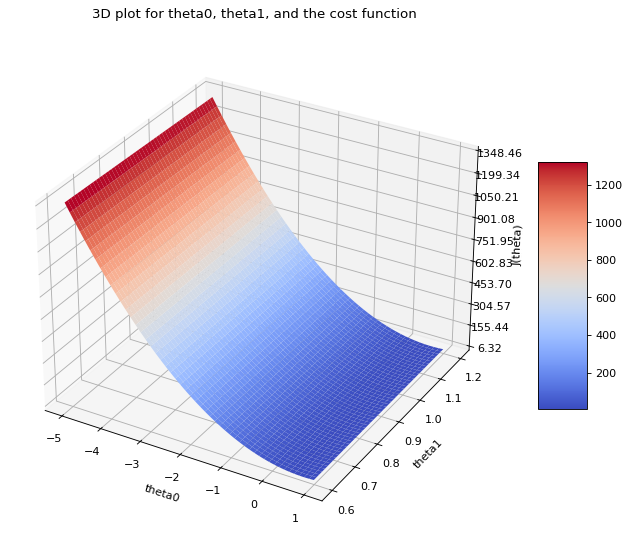

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, J_matrix, cmap=cm.coolwarm,)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D plot for theta0, theta1, and the cost function\n")
plt.show()